# Detecting Aruco Markers

In [5]:
# Import the necessary packages
import argparse
import imutils
import cv2
import sys
from matplotlib import pyplot as plt


## Define the inputs: image and ArUco dictionary

In [6]:

# Define the image and dictionary
image_file = './images/image_test01.jpg'
dictionary_id = 'DICT_6X6_250'

# Load the input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread(image_file)


# Define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

if ARUCO_DICT.get(dictionary_id, None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(dictionary_id))
else:
  print("[INFO] detecting '{}' tags...".format(dictionary_id))


[INFO] loading image...
[INFO] detecting 'DICT_6X6_250' tags...


## Detcting the markers and drawing in the image

[INFO] ArUco marker ID: 40
[INFO] ArUco marker ID: 98
[INFO] ArUco marker ID: 62
[INFO] ArUco marker ID: 124
[INFO] ArUco marker ID: 23
[INFO] ArUco marker ID: 203


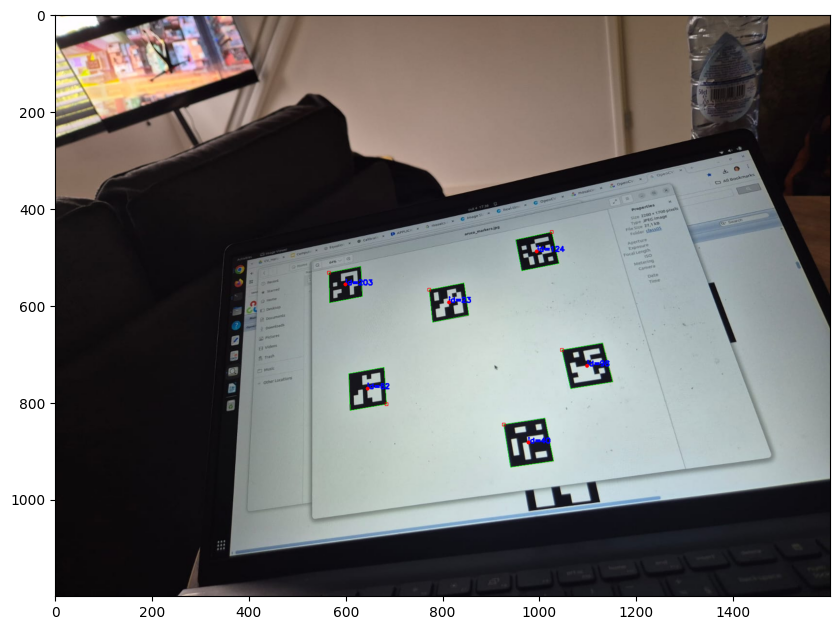

In [7]:
# Flag to open OpenCV windows or Matplotlib figures
OPENCV_SHOW = False


# Load the ArUCo dictionary, grab the ArUCo parameters, and detect
# the markers
arucoDict = cv2.aruco.getPredefinedDictionary(ARUCO_DICT[dictionary_id])
arucoParams = cv2.aruco.DetectorParameters()
arucoDetector = cv2.aruco.ArucoDetector(arucoDict, arucoParams)


# Detect the markers in the image
corners, ids, rejected = arucoDetector.detectMarkers(image)

# Verify *at least* one ArUco marker was detected
if len(corners) > 0:
	# Flatten the ArUco IDs list
	ids = ids.flatten()
	# Draw the bounding box of the ArUCo detection
	img_corners = cv2.aruco.drawDetectedMarkers(image, corners, ids)

	# Loop over the detected ArUCo corners
	for (markerCorner, markerID) in zip(corners, ids):
		# Extract the marker corners (which are always returned in
		# top-left, top-right, bottom-right, and bottom-left order)
		corners_i = markerCorner.reshape((4, 2))
		topLeft, topRight, bottomRight, bottomLeft = corners_i
		# Compute and draw the center (x, y)-coordinates of the ArUco
		# marker
		cX = int((topLeft[0] + bottomRight[0]) / 2.0)
		cY = int((topLeft[1] + bottomRight[1]) / 2.0)
		cv2.circle(img_corners, (cX, cY), 4, (0, 0, 255), -1)

		print("[INFO] ArUco marker ID: {}".format(markerID))



# Show the output image

if (OPENCV_SHOW):

  cv2.namedWindow("Image",cv2.WINDOW_NORMAL)
  cv2.imshow("Image", image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

else:
  img_corners = cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(10,10))
  plt.imshow(img_corners)
  plt.show()




